# Task 2 - To Explore Supervised Machine Learning

## Name: YASH MAKADIA
## Email Id: yashmakadia1908@gmail.com

## **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing necessary libraries
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [4]:
#To use plotly express offline
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Importing the datasets
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [8]:
#To display top 5 rows
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
#To display bottom 5 rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## Check Statistical Summary

In [10]:
# To view some basic statistical details.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Check the data types

In [37]:
# To find the dtypes in the DataFrame of each columns
df.dtypes

Actual         int64
Predicted    float64
dtype: object

In [12]:
# To check the total null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
#Importing necessary libraries
import plotly
import plotly.express as px
import plotly.graph_objects as go

## EDA (Exploratory Data Analysis)

In [14]:
#Plotting scatter plot using plotly express
px.scatter(df, x="Hours", y="Scores",color='Scores',title='Hours vs Percentage')

Display the above image

<img src="newplot (1).png">

The scatter plot indicates positive linear relationship between both the variables

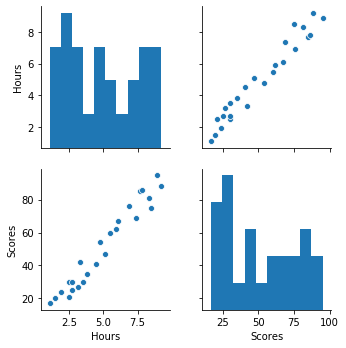

In [15]:
# Pair Plot
sns.pairplot(df)
plt.show()

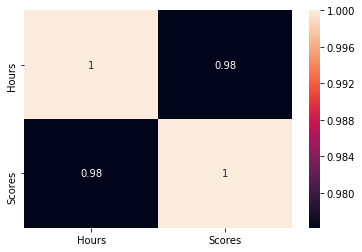

In [23]:
# Plotting heat map
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show()

In [16]:
# Separating the independent and dependant variables
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [17]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [25]:
# Intilializing and training the Linear Regression model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Regression Line

In [26]:
# Plotting the regression line using plotly express
fig = px.scatter(
    df, x='Hours', y='Scores', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

Display the above image

<img src='newplot.png'>

In [27]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [39]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [28]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting the Scores if one studies for 9.25hrs

In [29]:
predicted_score = regressor.predict([[9.25]])

In [30]:
print(predicted_score)

[93.69173249]


From the above result we can say that if a studied for 9.25 then student will secured 93.69 MARKS

## Train and Test accuracy

In [31]:
# Accuracy of train data
regressor.score(X_train, y_train)

0.9515510725211553

In [32]:
# Accuracy of test data
regressor.score(X_test,y_test)

0.9454906892105356

## Evaluating the model

In [33]:
#R2 Score
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105356

In [35]:
# Predicting errors
from sklearn import metrics
print("Mean Absolute Erroe :",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Erroe : 4.183859899002975
Mean Squared Error : 21.5987693072174
Root Mean Squared Error : 4.6474476121003665
